# Load necessary packages

In [1]:
import pandas as pd
import numpy as np

hex_salmon = '#F68F83'
hex_gold = '#BC9661'
hex_indigo = '#2D2E5F'
hex_maroon = '#8C4750'
hex_white = '#FAFAFA'
hex_blue = '#7EB5D2'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates

import matplotlib.font_manager as font_manager
mpl.font_manager._rebuild()

mpl.rcParams['font.family'] = 'SF Mono'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['axes.labelweight'] = 'medium'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[hex_indigo, hex_salmon, hex_maroon])
mpl.rcParams["figure.titlesize"] = 'large'
mpl.rcParams["figure.titleweight"] = 'semibold'

from termcolor import colored

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, accuracy_score

import tensorflow as tf

from entsoe import EntsoePandasClient

In [2]:
features = pd.read_pickle(f"./features.pkl")

In [3]:
features.head(5)

,ID3,VOL,MCP,LOAD,LOAD_F,LOAD_FE,ID3 (-4),ID3 (-5),ID3 (-6),ID3 (-7),...,HOD 14,HOD 15,HOD 16,HOD 17,HOD 18,HOD 19,HOD 20,HOD 21,HOD 22,HOD 23
2015-01-01 05:00:00+00:00,27.500000,29.0,27.41,8291.75,9994.25,1702.50,25.625000,29.100000,26.357143,26.073529,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 06:00:00+00:00,26.780822,28.0,27.52,8638.25,11882.00,3243.75,29.100000,26.357143,26.073529,27.538462,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 07:00:00+00:00,25.852273,65.0,26.80,8927.25,13240.00,4312.75,26.357143,26.073529,27.538462,31.480519,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 08:00:00+00:00,24.400000,18.0,28.48,9312.50,13817.25,4504.75,26.073529,27.538462,31.480519,36.581111,...,0,0,0,0,0,0,0,0,0,0
2015-01-01 09:00:00+00:00,25.625000,15.0,27.71,9933.25,14072.50,4139.25,27.538462,31.480519,36.581111,35.371102,...,0,0,0,0,0,0,0,0,0,0


In [4]:
features.tail(5)

,ID3,VOL,MCP,LOAD,LOAD_F,LOAD_FE,ID3 (-4),ID3 (-5),ID3 (-6),ID3 (-7),...,HOD 14,HOD 15,HOD 16,HOD 17,HOD 18,HOD 19,HOD 20,HOD 21,HOD 22,HOD 23
2018-12-21 23:00:00+00:00,50.911996,499.5,50.63,11756.25,12950.00,1193.75,53.277543,53.479330,54.977402,57.227163,...,0,0,0,0,0,0,0,0,0,1
2018-12-22 00:00:00+00:00,53.554378,309.1,53.07,11164.25,12318.00,1153.75,53.479330,54.977402,57.227163,57.961460,...,0,0,0,0,0,0,0,0,0,0
2018-12-22 01:00:00+00:00,53.716854,438.8,48.50,10796.75,11741.50,944.75,54.977402,57.227163,57.961460,58.304843,...,0,0,0,0,0,0,0,0,0,0
2018-12-22 02:00:00+00:00,52.950763,294.6,46.54,10626.25,11420.75,794.50,57.227163,57.961460,58.304843,57.755109,...,0,0,0,0,0,0,0,0,0,0
2018-12-22 03:00:00+00:00,53.277543,439.2,39.50,10685.50,11313.00,627.50,57.961460,58.304843,57.755109,57.734450,...,0,0,0,0,0,0,0,0,0,0


In [5]:
inputs = features[['ID3']]
outputs = features[['ID3']]

inputs_train = inputs[inputs.index.year < 2018]
outputs_train = outputs[outputs.index.year < 2018]

inputs_test = inputs[inputs.index.year == 2018]
outputs_test = outputs[outputs.index.year == 2018]

# Scale inputs
scaler = MinMaxScaler()

inputs_train = pd.DataFrame(scaler.fit_transform(inputs_train), columns = inputs_train.columns)
inputs_test = pd.DataFrame(scaler.transform(inputs_test), columns = inputs_test.columns)

time_steps = 6
for_periods = 1
lag = 4

# X_train and y_train

X_train = []
y_train = []

for i in range(0, len(outputs_train)-time_steps-lag+1):
    for ii in range(0, time_steps):
        X_train.extend(inputs_train.iloc[i+ii].to_numpy())
    y_train.extend(outputs_train.iloc[i+time_steps+lag-1].to_numpy())

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = X_train.reshape(y_train.shape[0], time_steps, inputs.shape[1])

# X_test and y_test

X_test = []
y_test = []

for i in range(0, len(outputs_test)-time_steps-lag+1):
    for ii in range(0, time_steps):
        X_test.extend(inputs_test.iloc[i+ii].to_numpy())
    y_test.extend(outputs_test.iloc[i+time_steps+lag-1].to_numpy())

X_test, y_test = np.array(X_test), np.array(y_test)

X_test = X_test.reshape(y_test.shape[0], time_steps, inputs.shape[1])

In [6]:
def LSTM_model(X_train, y_train, X_test, scaler):
    # create a model
    from keras.models import Sequential
    from keras.layers import Dense, SimpleRNN, GRU, LSTM
    from keras.optimizers import SGD, Adam
    
    model_lstm = Sequential()
    model_lstm.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2]), activation = 'tanh'))
    model_lstm.add(LSTM(units = 100, return_sequences = True))
    model_lstm.add(LSTM(units = 50, return_sequences = False))
    
    model_lstm.add(Dense(units = 1, activation = 'linear'))

    optimizer = Adam(clipvalue = 0.5)
    # model_lstm.compile(loss = 'mse', optimizer=optimizer)

    # Compiling
    model_lstm.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    # Fitting to the training set
    history = model_lstm.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 5, batch_size = 16, verbose = 1)

    LSTM_prediction = model_lstm.predict(X_test)
    # LSTM_prediction = scaler.inverse_transform(LSTM_prediction)

    # self.model = model_lstm

    return model_lstm, LSTM_prediction, history

my_LSTM_model, LSTM_prediction, history = LSTM_model(X_train, y_train, X_test, scaler)

Epoch 1/5
1586/1586 [==============================] - 46s 27ms/step - loss: 589.9597 - accuracy: 0.0000e+00 - val_loss: 561.4542 - val_accuracy: 0.0000e+00
Epoch 2/5
1586/1586 [==============================] - 33s 21ms/step - loss: 254.7856 - accuracy: 0.0000e+00 - val_loss: 545.5321 - val_accuracy: 0.0000e+00
Epoch 3/5
1586/1586 [==============================] - 34s 21ms/step - loss: 252.3401 - accuracy: 0.0000e+00 - val_loss: 425.8347 - val_accuracy: 0.0000e+00
Epoch 4/5
1586/1586 [==============================] - 43s 27ms/step - loss: 214.6293 - accuracy: 0.0000e+00 - val_loss: 339.0174 - val_accuracy: 0.0000e+00
Epoch 5/5
1586/1586 [==============================] - 37s 23ms/step - loss: 221.1812 - accuracy: 0.0000e+00 - val_loss: 333.5241 - val_accuracy: 0.0000e+00


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


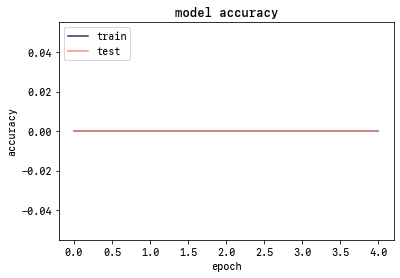

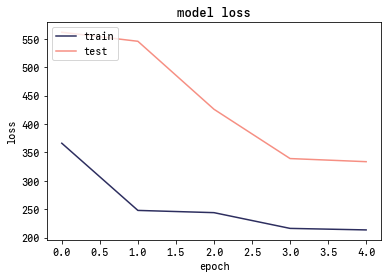

In [7]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
def actual_pred_plot(preds):

    actual_pred = pd.DataFrame()

    # mask = (ID3.index.year == 2018) 
    actual_pred['Actual'] = y_test
    actual_pred['Predicted'] = preds[:, 0]

    from keras.metrics import MeanSquaredError
    m = MeanSquaredError()
    actual_pred['Actual'] = actual_pred['Actual'].astype(int)
    actual_pred['Predicted'] = actual_pred['Predicted'].astype(int)
    m.update_state(np.array(actual_pred['Actual']), np.array(actual_pred['Predicted']))
    
    return (m.result().numpy(), actual_pred)

m, prediction = actual_pred_plot(LSTM_prediction)

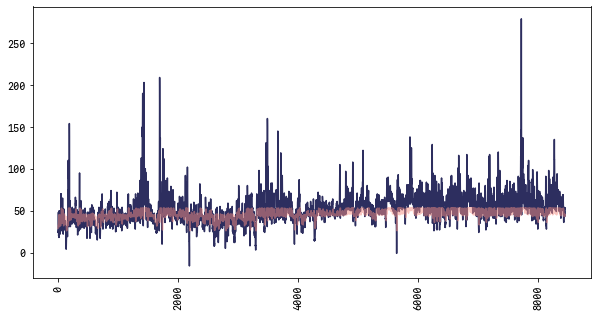

In [9]:
####################################################################################################
# Pre

actual_pred = prediction

# actual_pred = pd.DataFrame()

# actual_pred['Actual'] = features['ID3'][0:len(prediction)]
# actual_pred['Predicted'] = prediction[:, 0]

####################################################################################################
# Plot 1

fig, ax = plt.subplots(figsize = (10 ,5))

x, y = actual_pred.index, actual_pred['Actual']

ax.plot(x, y)

####################################################################################################
# Plot 2

x, y = actual_pred.index, actual_pred['Predicted']

ax.plot(x, y, alpha = 0.5)

plt.xticks(rotation = 90);

In [10]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

smape(actual_pred['Actual'], actual_pred['Predicted'])

23.82630327673563

In [11]:
for key in history.history.keys():
    plt.plot(history.history[key],label=key)
plt.title("loss={:5.4f}".format(hist.history["loss"][-1]))
plt.legend()
plt.yscale('log')
plt.show()

NameError: name 'hist' is not defined